In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
import os
os.chdir("../src/")
import maddlib  # maddlib.py
os.chdir("../test/")

In [3]:
# Load train and test sets
X_train = pd.read_csv("./data/X_train.csv")
X_test = pd.read_csv("./data/X_test.csv")
y_train = pd.read_csv("./data/y_train.csv")
y_test = pd.read_csv("./data/y_test.csv")

In [4]:
X_train.head()

,gender,highest_education,poverty,age,disability,num_of_prev_attempts,studied_credits,sum_click
0,0.0,0.50,1.0,0.0,0.0,0.000000,0.05,0.125404
1,1.0,0.50,1.0,0.0,0.0,0.000000,0.10,0.130624
2,1.0,0.25,0.0,0.0,0.0,0.000000,0.05,0.026597
3,1.0,0.25,1.0,0.0,1.0,0.000000,0.15,0.045447
4,1.0,0.50,1.0,0.0,1.0,0.166667,0.05,0.059574


In [5]:
y_train.head()

,final_result
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


In [6]:
# Training phase: Fit a classifier
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train.values.ravel())

LogisticRegression(random_state=0)

In [7]:
# Testing phase: Get the predicted probabilities of positive predictions
y_pp = clf.predict_proba(X_test)[:, 1] 

# Two groups based on a single feature

## 1. MADD evaluation

In [8]:
# Choose an individual sensitive feature (that should be binary) to evaluate algorithmic fairness
sensitive_feature = "gender"

# Select a bandwidth
h1 = 0.01

In [9]:
# Compute the MADD
madd = maddlib.MADD(h=h1, X_test=X_test, pred_proba=y_pp, sf="gender")
print("MADD:", madd)

MADD: 0.6435401439797769


## 2. MADD plot

In [10]:
y_pp_sf0, y_pp_sf1 = maddlib.separate_pred_proba(X_test, y_pp, sensitive_feature)

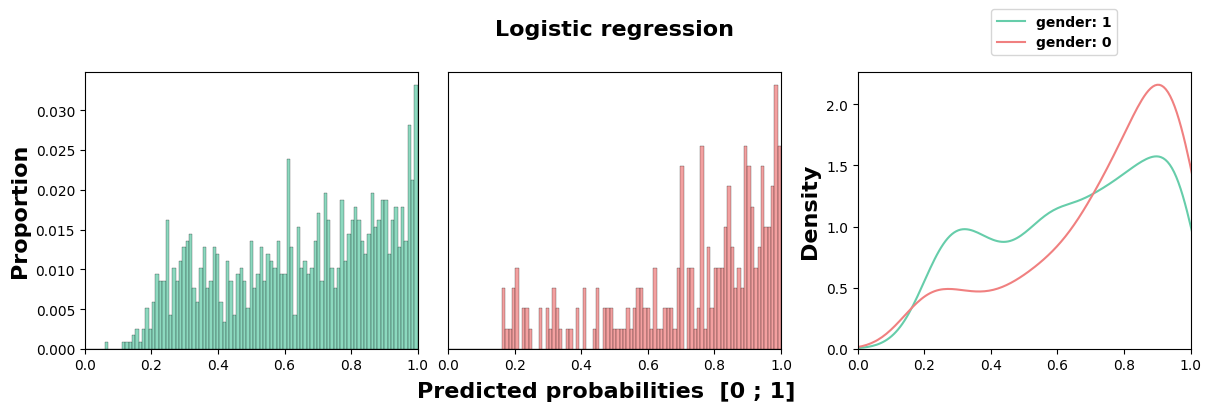

In [11]:
maddlib.madd_plot(h1, y_pp_sf0, y_pp_sf1, sensitive_feature, "Logistic regression")

# Two groups based on two different features

## 1. MADD evaluation

In [12]:
ind_women = X_test[X_test['gender'] == 0].index
ind_disabled = X_test[X_test['disability'] == 1].index

In [13]:
y_pp_women = y_pp[ind_women]
y_pp_disabled = y_pp[ind_disabled]

In [14]:
# Select a bandiwdth
h2 = 0.05

In [15]:
# Compute the MADD
madd = maddlib.MADD(h2, pred_proba_sf0=y_pp_women, pred_proba_sf1=y_pp_disabled)
print("MADD:", madd)

MADD: 0.5239867659222498


## 2. MADD plot

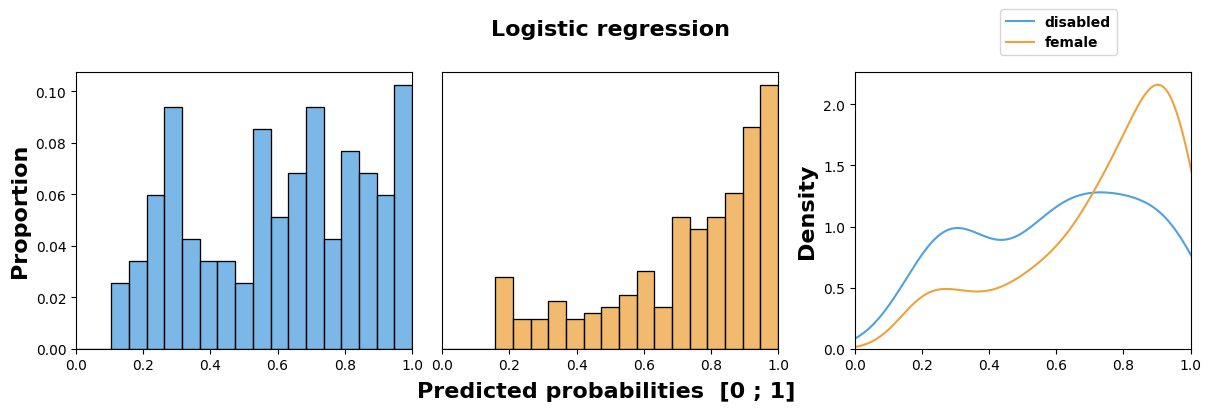

In [16]:
maddlib.madd_plot(h2, y_pp_women, y_pp_disabled, ("female", "disabled"), "Logistic regression")